In [309]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import \
    cross_val_predict, cross_val_score, train_test_split, KFold


In [241]:
# Load and visualize data (EDA=exploratory data analysis)
iris = datasets.load_iris()
print(iris.keys())

X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target.astype(int))
n_classes = len(np.unique(y.values))
print(X.head())
print(X.info())
print(X.describe())

dict_keys(['target_names', 'target', 'feature_names', 'data', 'DESCR'])
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333 

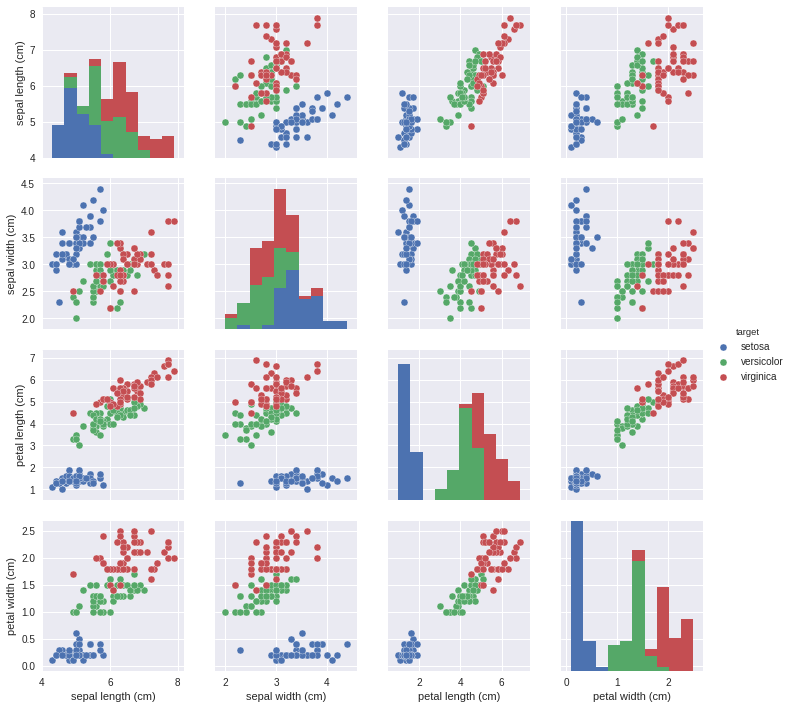

In [169]:
# Matrix scatter plot with seaborn
df = X.copy()
df["target"] = y.copy().replace(n_classes, iris.target_names)
plt.figure()
sns.pairplot(df, hue="target")
plt.show()

In [171]:
# Split train/test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y.values.ravel(), test_size=0.2, stratify=y) # stratify important to respect distrib

In [177]:
# Fit and show cross val score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print(cross_val_score(knn, X_train, y_train, cv=5).mean())

0.975


In [189]:
# Compare perf on test
print(knn.score(X_test, y_test))

0.933333333333
<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 63 to 26
Data columns (total 4 columns):
sepal length (cm)    120 non-null float64
sepal width (cm)     120 non-null float64
petal length (cm)    120 non-null float64
petal width (cm)     120 non-null float64
dtypes: float64(4)
memory usage: 4.7 KB


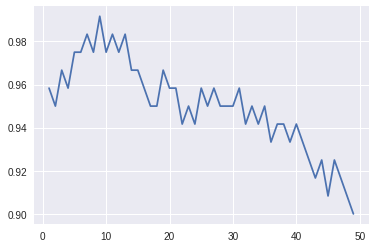

n_opt is 8
Final score on test is 0.966667


In [312]:
# Optimize n_neighbors with KFold
n_neighbors = range(1,50)
scores = [];
for n in n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    scores.append(cross_val_score(knn, X_train, y_train, cv=5).mean())

plt.figure()
plt.plot(n_neighbors, scores)
plt.show()

nopt_neighbors = np.argmax(scores)
print("n_opt is %g" % nopt_neighbors)

knn = KNeighborsClassifier(n_neighbors=nopt_neighbors)
knn.fit(X_train, y_train)
print("Final score on test is %g" % knn.score(X_test, y_test))

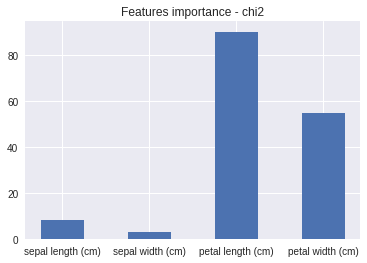

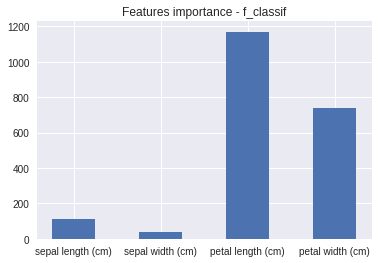

In [310]:
# Feature selection
skb_chi2 = SelectKBest(chi2)
feature_scores_chi2 = skb_chi2.score_func(X_train, y_train)[0] # [1] are p-values

skb_fclassif = SelectKBest(f_classif)
feature_scores_fclassif = skb_fclassif.score_func(X_train, y_train)[0] # [1] are p-values

n_features = len(feature_scores_chi2)

plt.figure()
plt.bar(range(n_features), feature_scores_chi2, .5)
plt.xticks(range(n_features), X_train.columns)
plt.title("Features importance - chi2")

plt.figure()
plt.bar(range(n_features), feature_scores_fclassif, .5)
plt.xticks(range(n_features), X_train.columns)
plt.title("Features importance - f_classif")

plt.show()